In [62]:
import pandas as pd
import seaborn as sn
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [10]:
df = pd.read_csv("height.csv")
df.head()


,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [12]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<AxesSubplot: xlabel='Height', ylabel='Count'>

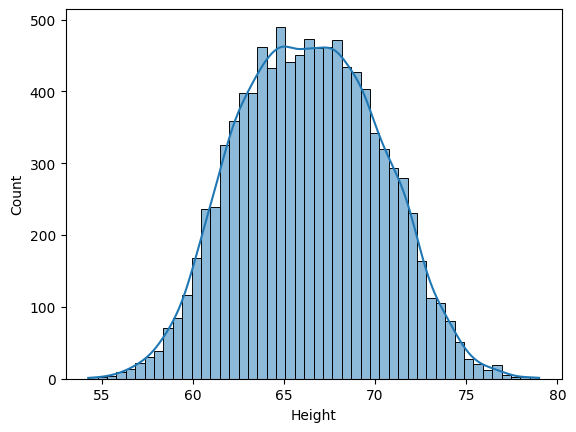

In [14]:
sn.histplot(df.Height, kde=True)

In [15]:
mean = df.Height.mean()
mean

66.367559754866

In [17]:
std_dev = df.Height.std()
std_dev

3.847528120795573

In [18]:
mean - 3*std_dev

54.824975392479274

In [19]:
mean + 3*std_dev

77.91014411725271

In [21]:
df [df.Height <54.82]

,Gender,Height
6624,Female,54.616858
9285,Female,54.263133


In [23]:
df [(df.Height >77.91) | (df.Height <54.82)]

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [24]:
df_no_outlier = df[(df.Height < 77.91) & (df.Height > 54.82)]
df_no_outlier.shape

(9993, 2)

In [25]:
df.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [28]:
df['zscore'] = (df.Height - df.Height.mean())/df.Height.std()
df.head()


,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [31]:
(73.847017-66.367559754866)/3.847528120795573

1.9439642831219734

In [34]:
df[(df.zscore>3) | (df.zscore<-3)]

,Gender,Height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [35]:
df_no_outlier = df[(df.zscore<3) & (df.zscore>-3)]
df_no_outlier.shape

(9993, 3)

In [36]:
ds = pd.read_csv("bhp.csv")
ds.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [37]:
ds.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

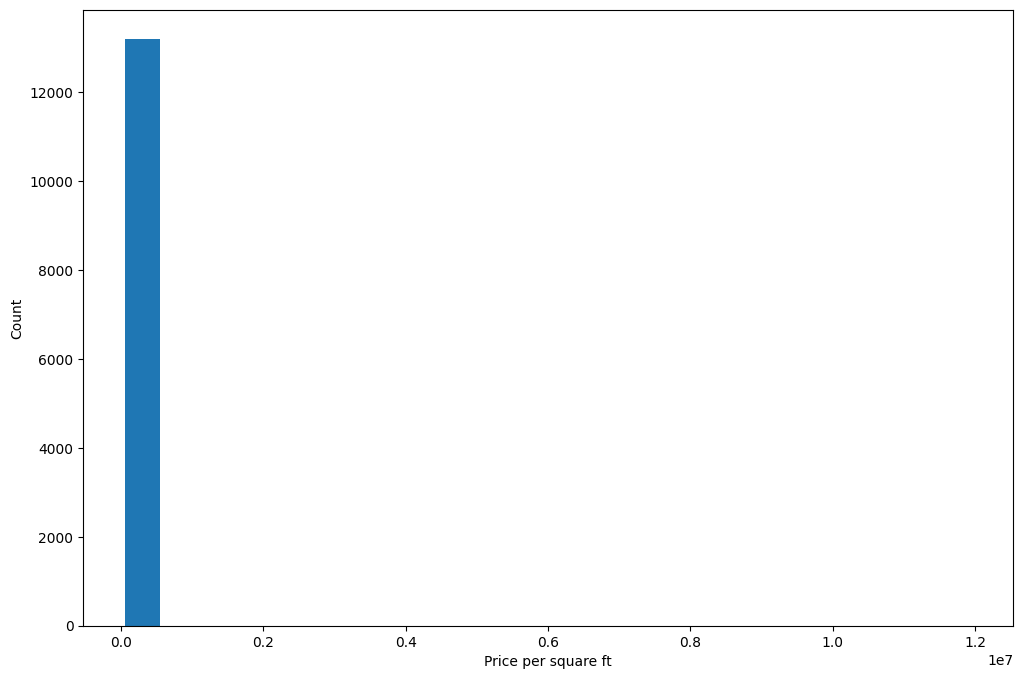

In [63]:
plt.hist(ds.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

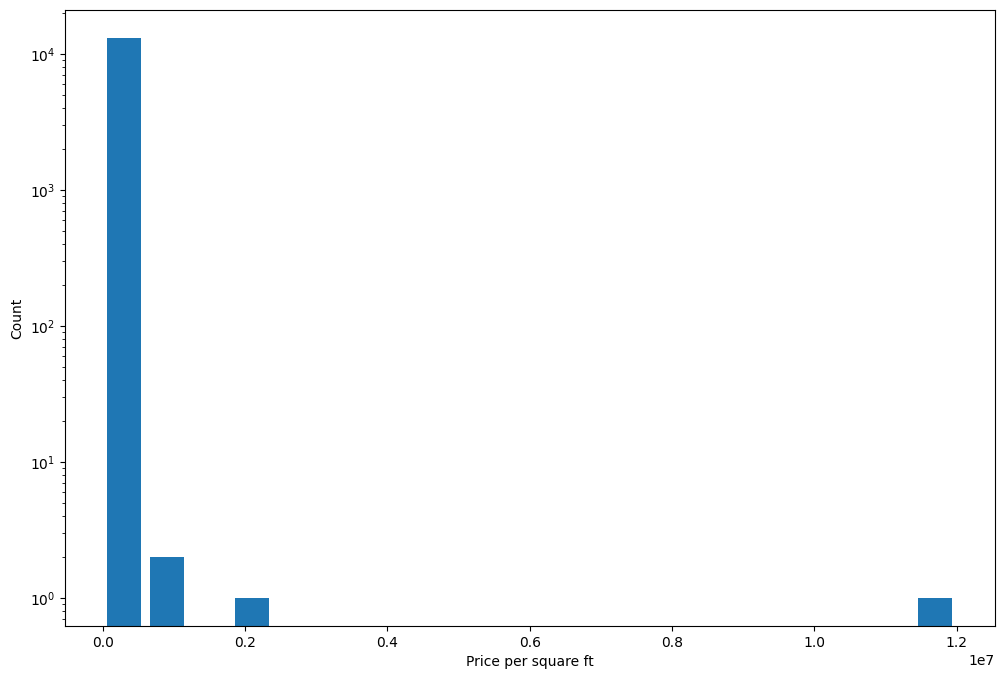

In [65]:
plt.hist(ds.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [39]:
mean = ds.price_per_sqft.mean()
mean

7920.336742424242

In [40]:
std = ds.price_per_sqft.std()
std

106727.16032810867

In [49]:
mean - 4*std

-418988.30457001046

In [50]:
mean + 4*std

434828.9780548589

In [51]:
ds [(ds.price_per_sqft > 434828.9780548589) | (ds.price_per_sqft < -418988.30457001046)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
345,other,3 Bedroom,11.0,3.0,74.0,3,672727,6.229030
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000,5.781843
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000,112.362023
4924,other,7 BHK,5.0,7.0,115.0,7,2300000,21.476067


In [53]:
ds_no_outlier = ds[(ds.price_per_sqft < 434828.9780548589) & (ds.price_per_sqft > -418988.30457001046)]
ds_no_outlier.shape

(13196, 8)

In [47]:
ds['zscore'] = (ds.price_per_sqft - ds.price_per_sqft.mean())/ds.price_per_sqft.std()
ds.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030970
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015697
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034390


In [55]:
ds_no_outlier = ds[(ds.zscore < 4) & (ds.zscore > -4)]
ds_no_outlier.shape

(13196, 8)

In [61]:
for i in range(0,10):
    print("Good Job Rowen!!!")

Good Job Rowen!!!
Good Job Rowen!!!
Good Job Rowen!!!
Good Job Rowen!!!
Good Job Rowen!!!
Good Job Rowen!!!
Good Job Rowen!!!
Good Job Rowen!!!
Good Job Rowen!!!
Good Job Rowen!!!
